# Titanic Predictions

* The objective of this project is to create a model that predicts if a person would survive Titanics sinking

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Training Data
df = pd.read_csv('train.csv')

## Exploratory data analisys

In [3]:
print(df.columns)
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


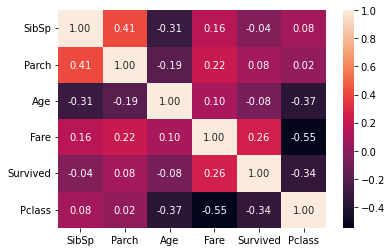

In [7]:
columns = ["SibSp", "Parch", "Age", "Fare", "Survived", "Pclass"]
sns.heatmap(df[columns].corr(), annot = True, fmt = ".2f")
plt.show()

* We can see that the Fare seems to have some correlation with survival

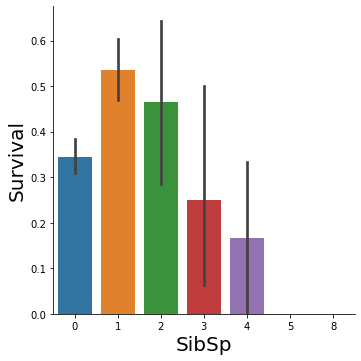

In [8]:
sns.catplot(x = "SibSp", y = "Survived", data = df, kind = "bar")
plt.xlabel("SibSp",fontsize=20)
plt.ylabel("Survival",fontsize=20)
plt.show()

* People with 1 or 2 siblings have more chance to survive

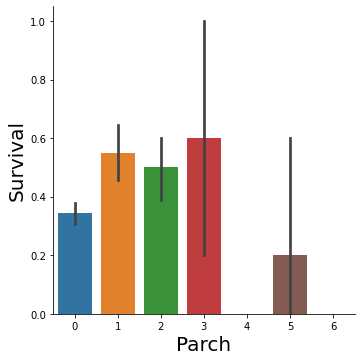

In [9]:
sns.catplot(x = "Parch", y = "Survived", data = df, kind = "bar")
plt.xlabel("Parch",fontsize=20)
plt.ylabel("Survival",fontsize=20)
plt.show()

* People with 1, 2 or 3 parents/children has more chance to survive

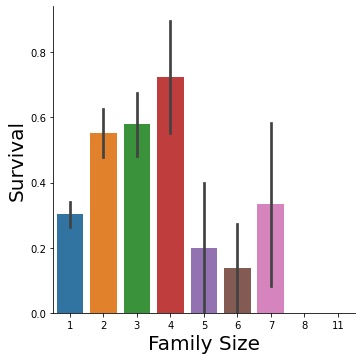

In [10]:
df["Family_size"] = df["SibSp"] + df["Parch"] + 1
sns.catplot(x = "Family_size", y = "Survived", data = df, kind = "bar")
plt.xlabel("Family Size",fontsize=20)
plt.ylabel("Survival",fontsize=20)
plt.show()

* Families with less than 5 people has a higher chance of surviving

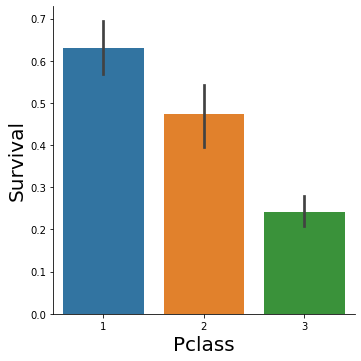

In [11]:
sns.catplot(x = "Pclass", y = "Survived", data = df, kind = "bar")
plt.xlabel("Pclass",fontsize=20)
plt.ylabel("Survival",fontsize=20)
plt.show()

* Seems that Pclass is correlated with Survival

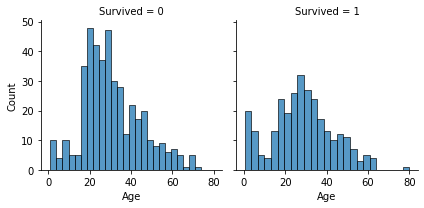

In [12]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.histplot, "Age", bins = 25)
plt.show()

* We can observe that children and older people has a higher chance of surviving, while ages between 20 and 30 years has a lower chance

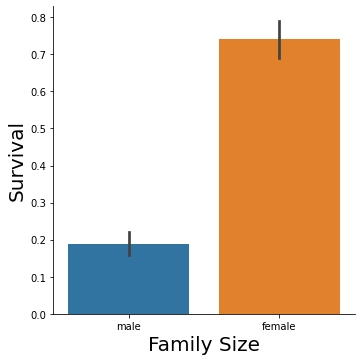

In [13]:
sns.catplot(x = "Sex", y = "Survived", data = df, kind = "bar")
plt.xlabel("Family Size",fontsize=20)
plt.ylabel("Survival",fontsize=20)
plt.show()

* The Sex variable seems to have a strong relation with survival

In [14]:
df['SibSp'] = df['SibSp'].apply(lambda x: 1 if (x>=0 and x<3)  else 0)
df['Parch'] = df['Parch'].apply(lambda x: 1 if (x>0 and x<4)  else 0)
df['Family_size'] = df['Family_size'].apply(lambda x: 1 if (x>0 and x<5 and x==7)  else 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,1,0,373450,8.0500,NaN,S,0


In [15]:
#columns = ["SibSp", 'Family_size', 'Parch', "Survived"]
#sns.heatmap(df[columns].corr(), annot = True, fmt = ".2f")
#plt.show()

## Data Wrangling

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

In [17]:
# Substituting null values from column 'Age' using mean
#df['Age'] = df['Age'].replace(np.nan,df['Age'].mean())
df.loc[(df["Sex"]=="male") & (df["Age"].isna()), "Age"] = df["Age"].loc[df["Sex"]=="male"].mean()
df.loc[(df["Sex"]=="female") & (df["Age"].isna()), "Age"] = df["Age"].loc[df["Sex"]=="female"].mean()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

In [18]:
# Drop 'Cabin' column
df = df.drop('Cabin', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,1,0,373450,8.0500,S,0


In [19]:
# Drop rows with null values
df = df.dropna(subset=['Embarked'])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [20]:
# Converting sex to binnary variable
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [21]:
# Dropping columns that will not be used
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,0
2,1,3,1,26.0,1,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,0
4,0,3,0,35.0,1,0,8.0500,S,0


In [22]:
# Create dummie variables
df_train = pd.get_dummies(df,prefix=['Embarked'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,1,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,0,35.0,1,0,8.0500,0,0,0,1


## Modeling

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Function that plots confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']); ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])

In [24]:
# Creates a dataframe to store models accuracy data
header = {'Model':[],'Accuracy':[]}
accuracy_df = pd.DataFrame(header)
accuracy_df

,Model,Accuracy


In [25]:
y = df_train['Survived'].to_numpy()
X = df_train.drop(['Survived'], axis = 1)
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

In [26]:
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Logistic Regression

In [27]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator = lr, param_grid = parameters, cv = 10) 
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters: ",logreg_cv.best_params_)
print("accuracy: ",logreg_cv.best_score_)

tuned hpyerparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.818368544600939


In [28]:
y_hat = logreg_cv.predict(X_test)
accuracy_df = accuracy_df.append({'Model':'Logistic Regression', 'Accuracy':metrics.accuracy_score(y_test, y_hat)}, ignore_index=True)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.7921348314606742


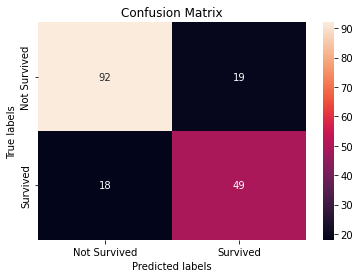

In [29]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### Support Vector Machine

In [30]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid')}
svm = SVC()
svm_cv = GridSearchCV(estimator = svm, param_grid = parameters, cv = 10) 
svm_cv.fit(X_train,y_train)
print("tuned hpyerparameters: ",svm_cv.best_params_)
print("accuracy: ",svm_cv.best_score_)

tuned hpyerparameters:  {'kernel': 'rbf'}
accuracy:  0.8142605633802816


In [31]:
y_hat = svm_cv.predict(X_test)
accuracy_df = accuracy_df.append({'Model':'SVM', 'Accuracy':metrics.accuracy_score(y_test, y_hat)}, ignore_index=True)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.848314606741573


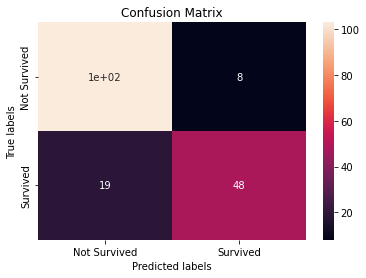

In [32]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### Decision Tree

In [33]:
parameters = {'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator = tree, param_grid = parameters, cv = 10) 
#tree_cv = tree
tree_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8198943661971831


In [34]:
y_hat = tree_cv.predict(X_test)
accuracy_df = accuracy_df.append({'Model':'Decision Tree', 'Accuracy':metrics.accuracy_score(y_test, y_hat)}, ignore_index=True)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.8146067415730337


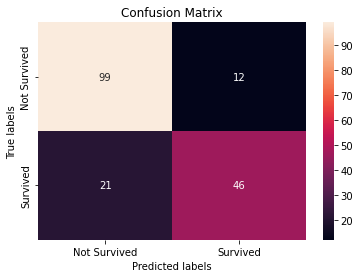

In [35]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### K Nearest Neighbors

In [36]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = KNN, param_grid = parameters, cv = 10) 
knn_cv.fit(X_train,y_train)
print("tuned hpyerparameters: ",knn_cv.best_params_)
print("accuracy: ",knn_cv.best_score_)

tuned hpyerparameters:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy:  0.8128129890453835


In [37]:
y_hat = knn_cv.predict(X_test)
accuracy_df = accuracy_df.append({'Model':'KNN', 'Accuracy':metrics.accuracy_score(y_test, y_hat)}, ignore_index=True)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.8314606741573034


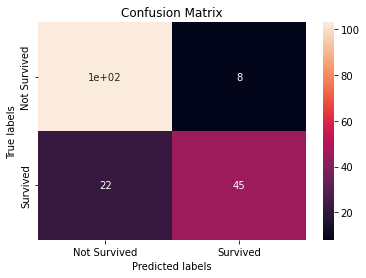

In [38]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## Random Forest

In [39]:
parameters = {'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 4],
             'min_samples_split': [2, 10],
             'n_estimators': [10, 100, 200]}


rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, param_grid = parameters, cv = 10)
rf_cv.fit(X_train,y_train)
print("tuned hpyerparameters: ",rf_cv.best_params_)
print("accuracy: ",rf_cv.best_score_)

tuned hpyerparameters:  {'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
accuracy:  0.8353482003129891


In [40]:
y_hat = rf_cv.predict(X_test)
accuracy_df = accuracy_df.append({'Model':'Rand Forest', 'Accuracy':metrics.accuracy_score(y_test, y_hat)}, ignore_index=True)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.8146067415730337


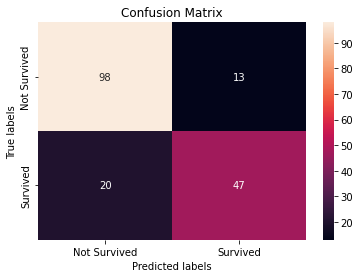

In [41]:
yhat = rf_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

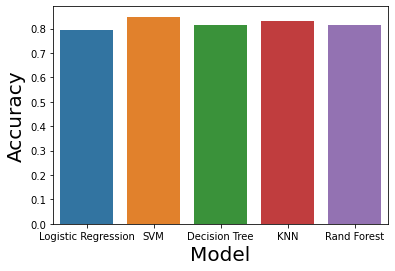

                 Model  Accuracy
0  Logistic Regression  0.792135
1                  SVM  0.848315
2        Decision Tree  0.814607
3                  KNN  0.831461
4          Rand Forest  0.814607


In [42]:
sns.barplot(x='Model', y='Accuracy', data = accuracy_df)
plt.xlabel("Model",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.show()
print(accuracy_df)

## Prediction

In [43]:
df_pred = pd.read_csv('test.csv')
df_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
df_pred["Family_size"] = df_pred["SibSp"] + df_pred["Parch"] + 1
df_pred = df_pred.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
#df_pred['Age'] = df_pred['Age'].replace(np.nan,df_pred['Age'].mean())
df_pred.loc[(df_pred["Sex"]=="male") & (df_pred["Age"].isna()), "Age"] = df_pred["Age"].loc[df_pred["Sex"]=="male"].mean()
df_pred.loc[(df_pred["Sex"]=="female") & (df_pred["Age"].isna()), "Age"] = df_pred["Age"].loc[df_pred["Sex"]=="female"].mean()
df_pred['Fare'] = df_pred['Fare'].replace(np.nan,df_pred['Fare'].mean())
df_pred['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_pred = pd.get_dummies(df_pred,prefix=['Embarked'])
df_pred['SibSp'] = df_pred['SibSp'].apply(lambda x: 1 if (x>=0 and x<3)  else 0)
df_pred['Parch'] = df_pred['Parch'].apply(lambda x: 1 if (x>0 and x<4)  else 0)
df_pred['Family_size'] = df_pred['Family_size'].apply(lambda x: 1 if (x>0 and x<5 and x==7)  else 0)
df_pred.shape

(418, 10)

In [45]:
X_pred = df_pred
transform = preprocessing.StandardScaler()
X_pred = transform.fit(X_pred).transform(X_pred)

In [46]:
y_pred = svm_cv.predict(X_pred)

In [47]:
header = {'PassengerId':[],'Survived':[]}
submission_df = pd.DataFrame(header)
submission_df['PassengerId'] = pd.read_csv('test.csv')['PassengerId']
submission_df['Survived'] = y_pred
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
submission_df.to_csv("submission.csv",index=False)